In [249]:
%matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("classic")

db = sqlite3.connect(r'C:\Users\User\Desktop\factbook.db')

q = ("select * from facts limit 5")
pd.read_sql_query(q, db)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [250]:
populations = ("select MIN(population) min_pop, MAX(population) max_pop, MIN(population_growth) min_pop_growth, MAX(population_growth) max_pop_growth from facts")
pd.read_sql_query(populations, db)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [251]:
zero_pop = ("select name, population from facts where population == 0")
pd.read_sql_query(zero_pop, db)

,name,population
0,Antarctica,0


In [252]:
highest_pop = ("select name, population from facts where population == 7256490011")
pd.read_sql_query(highest_pop, db)

,name,population
0,World,7256490011


In the database within the countries column Antartica is listed as having a population of 0. Based off of the CIA Factbook page 
for Antartica the info seems to be correct. 
Also, we're able to see that the country that is listed at around 7.2 billion in the country column is actually labled 
as the world count, and not a country at all. 

In [253]:
countries_data1 = ("select * from facts where (name != 'Antartica') and (name != 'World') limit 5")
countries_data2 = ("select population, population_growth, birth_rate, death_rate from facts where (select name != 'Antartica') and (name != 'World')")
countries = pd.read_sql_query(countries_data2, db)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015D5B79C048>,
      dtype=object)

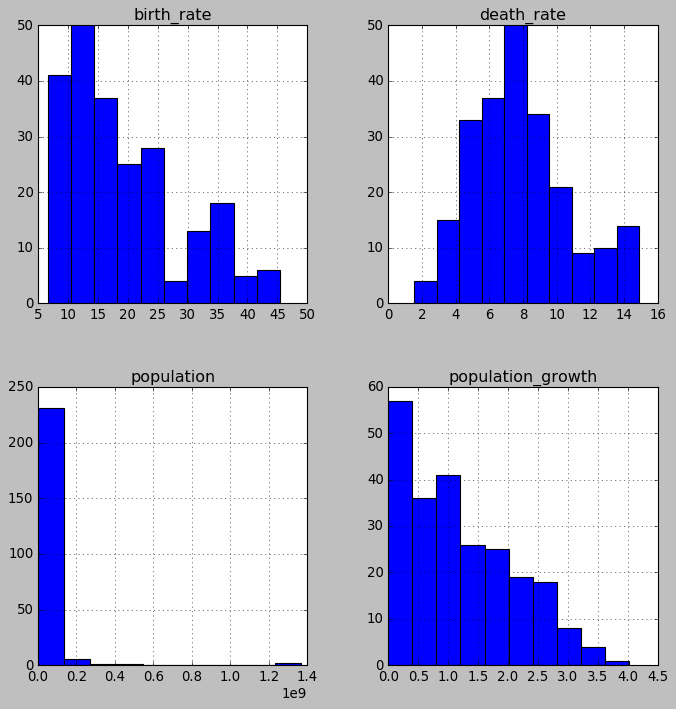

In [254]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
countries.hist(ax=ax)

In [255]:
pop_density = ("select name, CAST(population as float)/CAST(area_land as float) density from facts order by density desc limit 20")
density = pd.read_sql_query(pop_density, db)
density

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015D5BEC8F60>]],
      dtype=object)

<Figure size 640x480 with 0 Axes>

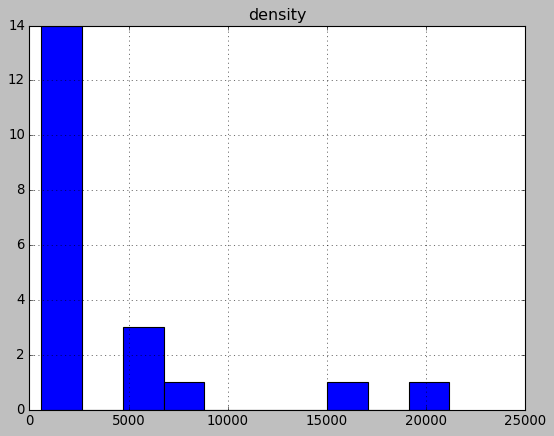

In [256]:
fig = plt.figure(figsize=(8,6))
density.hist()

In [257]:
highest_area_water = ("select name, CAST(area_water as float)/CAST(area_land as float) water_ratio from facts order by water_ratio desc limit 10")
water_ratio = pd.read_sql_query(highest_area_water, db)
water_ratio

,name,water_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
